In [15]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

frame_length = 32
frame_shift = 8

In [2]:
speech1 = sf.read('resources/speech1.wav')
phone = sf.read('resources/phone.wav')

In [3]:
speech1[0].shape

(45466,)

In [4]:
phone[0].shape

(32000,)

In [5]:
print(f'sampling rate of speech 1 is {speech1[1]}')
print(f'sampling rate of phone is {phone[1]}')

sampling rate of speech 1 is 16000
sampling rate of phone is 16000


In [6]:
sampling_rate = speech1[1]
nyquist_frequency = sampling_rate/2
speech1_data = speech1[0]
phone_data = phone[0]
millis_per_point = 1000 / sampling_rate
frame_length_samples = int(frame_length / millis_per_point)

In [7]:
frame_length_samples

512

In [8]:
def my_windowing(v_signal: np.ndarray, sampling_rate: int, frame_length: int, frame_shift: int) -> [np.ndarray, np.ndarray]:
    millis_per_point = 1000 / sampling_rate
    frame_length_num_points = frame_length / millis_per_point
    frame_shift_num_points = frame_shift / millis_per_point
    num_frames = int(np.floor((len(v_signal) - frame_length_num_points) / frame_shift_num_points) + 1)
    m_frames = np.zeros((num_frames, int(frame_length_num_points)))
    v_time_frame = np.zeros(num_frames)
    for i in range(num_frames):
        start = int(i * frame_shift_num_points)
        end = int(i * frame_shift_num_points + frame_length_num_points)
        m_frames[i] = v_signal[start:end]
        v_time_frame[i] = (start + end)/(2*sampling_rate)
    return [m_frames, v_time_frame]

In [9]:
def compute_freq_axis(m_mstft: np.ndarray):
    return np.linspace(0, sampling_rate//2, num=m_mstft.shape[1])

In [10]:
def remove_upper_half_spectrum(m_stft: np.ndarray) -> np.ndarray:
    m_stft_new = m_stft[:, :(int(m_stft.shape[1]/2)+1)]
    return m_stft_new

In [11]:
def compute_stft(v_signal: np.ndarray, fs: int, frame_length: int, frame_shift: int, v_analysis_window: np.ndarray) -> [np.ndarray, np.ndarray, np.ndarray]:
    m_frames, v_time_frame = my_windowing(v_signal, fs, frame_length, frame_shift)
    m_stft_full = np.zeros(m_frames.shape, dtype=np.complex128)
    #v_analysis_window = v_analysis_window(m_frames.shape[1])
    for i in range(m_frames.shape[0]):
        m_stft_full[i] = np.fft.fft(m_frames[i]*v_analysis_window)
    #v_freq = np.fft.rfftfreq(m_stft_full.shape[1], 1/fs)
    m_stft = remove_upper_half_spectrum(m_stft_full)
    v_freq = compute_freq_axis(m_stft)
    return [m_stft, v_freq, v_time_frame]


In [12]:
from scipy.signal import get_window

analysis_window = get_window('hann', int(frame_length_samples), fftbins=True)
m_stft, v_freq, v_time_frame = compute_stft(speech1_data, sampling_rate, frame_length, frame_shift, analysis_window)

In [13]:
m_stft[0]

array([ 3.15745447e-02+0.00000000e+00j, -1.72791452e-02+5.38223806e-04j,
        2.17352753e-03-8.15429498e-04j,  3.50385648e-04+6.60772353e-04j,
       -1.34549694e-03-2.53144828e-04j, -7.04542735e-04+5.91788147e-04j,
        1.42210015e-03-4.48602471e-04j, -6.78081571e-05-2.01460395e-04j,
       -7.60518877e-04-1.00649215e-04j,  6.51855601e-04+7.22698153e-04j,
       -2.66226037e-04-5.56217092e-04j,  8.93383582e-06-6.79183951e-04j,
        2.11814521e-04+9.00788153e-04j, -3.92550642e-04-1.70425685e-04j,
        4.50478024e-04-6.50327961e-05j, -3.05094872e-04+5.44960061e-04j,
       -4.00634958e-04-7.49313640e-04j,  5.38562353e-04+4.17888765e-04j,
        2.89943567e-04-2.65234087e-05j,  2.72804792e-05-3.05134435e-04j,
       -6.57823698e-04+2.92050961e-04j,  1.19116473e-04-2.04870079e-04j,
        3.60308201e-04+2.70804293e-04j, -5.91212270e-04-4.85189087e-04j,
        3.76071573e-04+4.10418070e-04j,  1.37181043e-04+1.66680415e-05j,
       -8.64697020e-05-1.86645669e-04j,  3.82357123

In [14]:
v_freq

array([   0.  ,   31.25,   62.5 ,   93.75,  125.  ,  156.25,  187.5 ,
        218.75,  250.  ,  281.25,  312.5 ,  343.75,  375.  ,  406.25,
        437.5 ,  468.75,  500.  ,  531.25,  562.5 ,  593.75,  625.  ,
        656.25,  687.5 ,  718.75,  750.  ,  781.25,  812.5 ,  843.75,
        875.  ,  906.25,  937.5 ,  968.75, 1000.  , 1031.25, 1062.5 ,
       1093.75, 1125.  , 1156.25, 1187.5 , 1218.75, 1250.  , 1281.25,
       1312.5 , 1343.75, 1375.  , 1406.25, 1437.5 , 1468.75, 1500.  ,
       1531.25, 1562.5 , 1593.75, 1625.  , 1656.25, 1687.5 , 1718.75,
       1750.  , 1781.25, 1812.5 , 1843.75, 1875.  , 1906.25, 1937.5 ,
       1968.75, 2000.  , 2031.25, 2062.5 , 2093.75, 2125.  , 2156.25,
       2187.5 , 2218.75, 2250.  , 2281.25, 2312.5 , 2343.75, 2375.  ,
       2406.25, 2437.5 , 2468.75, 2500.  , 2531.25, 2562.5 , 2593.75,
       2625.  , 2656.25, 2687.5 , 2718.75, 2750.  , 2781.25, 2812.5 ,
       2843.75, 2875.  , 2906.25, 2937.5 , 2968.75, 3000.  , 3031.25,
       3062.5 , 3093

The computed spectra is complex conjugate symmetric because the input signal is real, and one of the properties of the discrete Fourier transform is that the spectrum of a real signal is complex conjugate symmetric.

Since the upper half of the spectrum is redundant it can be removed, this saves memory and computation time. Moreover, given a sampling frequency, only frequencies up to the Nyquist frequency are relevant for speech signal processing.

Another advantage is that considering only the non-redundant part of the spectrum makes visualization easier.

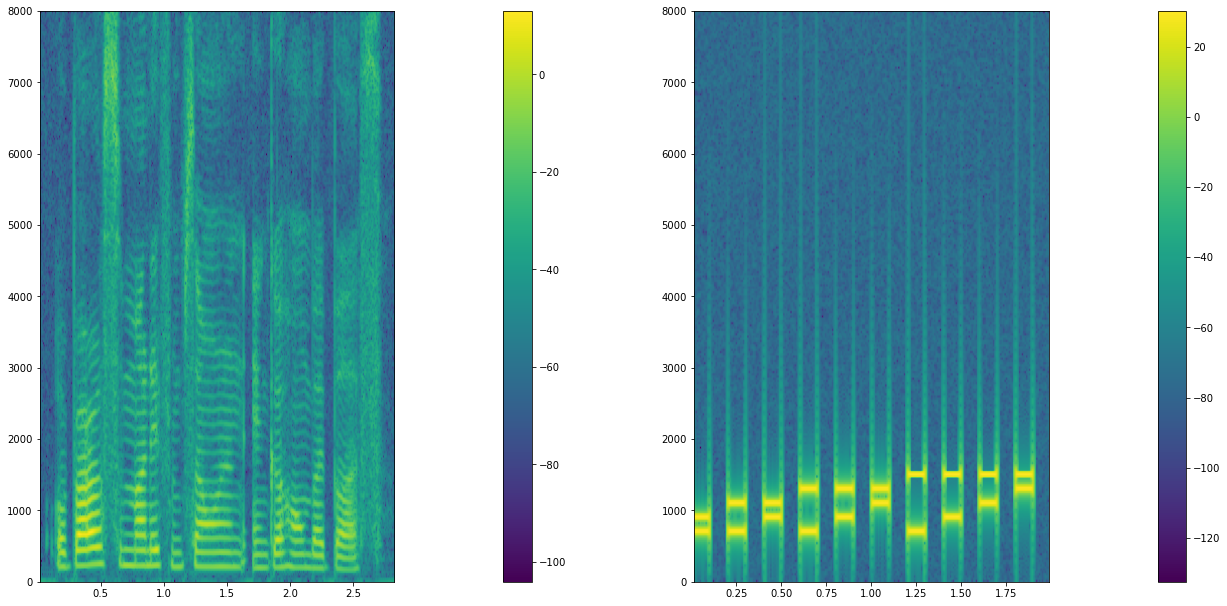

In [33]:
frame_length = 32
frame_shift = 8
frame_length_samples = int(frame_length / millis_per_point)
analysis_window = get_window('hann', int(frame_length_samples), fftbins=True)
m_stft, v_freq, v_time_frame = compute_stft(speech1_data, sampling_rate, frame_length, frame_shift, analysis_window)

fig = plt.figure()
fig.set_size_inches(21.5, 10.5)
ax = fig.add_subplot(121)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
v_freq[-1]], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)

m_stft_phone, v_freq_phone, v_time_frame_phone = compute_stft(phone_data, sampling_rate, frame_length, frame_shift, analysis_window)
ax = fig.add_subplot(122)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft_phone.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame_phone[0], v_time_frame_phone[-1], v_freq_phone[0],
                                                       v_freq_phone[-1]], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)

The magnitude is plotted in dB in the code to better visualize the dynamic range of the signal over time and frequency.

We need a lower limit because to calculate dB we use the logarithm, and the logarithm of 0 is -infinity.
thus, we introduce the lower limit to limit the range of values to a finite number.

In [22]:
print(f' The lower limit in the command above in dB is: {10*np.log10(10**(-15))}dB')

 The lower limit in the command above in dB is: -150.0dB


b) In the plotted image we can identify the voiced segments because that have positive gain (yellow in the image) that extends for a period of
time in a certain frequency and then exactly in multiples of that frequency in the same period of time, reflecting the periodic nature of the signal. We can see this just before time 0.5 and at 2.0 for example.

The unvoiced segments are characterized to be aperiodic and noisy, and we can identify it in the image in time segments that have positive gain
at all frequencies, a characteristic of noise. This can be seen for example just after time 2.5

Finally, the silence segments don't have a positive gain and can be seen in the darker areas of the image.

It is easier to visualize and identify the different types of speech segments in the spectrogram image, compared to the time domain representation.


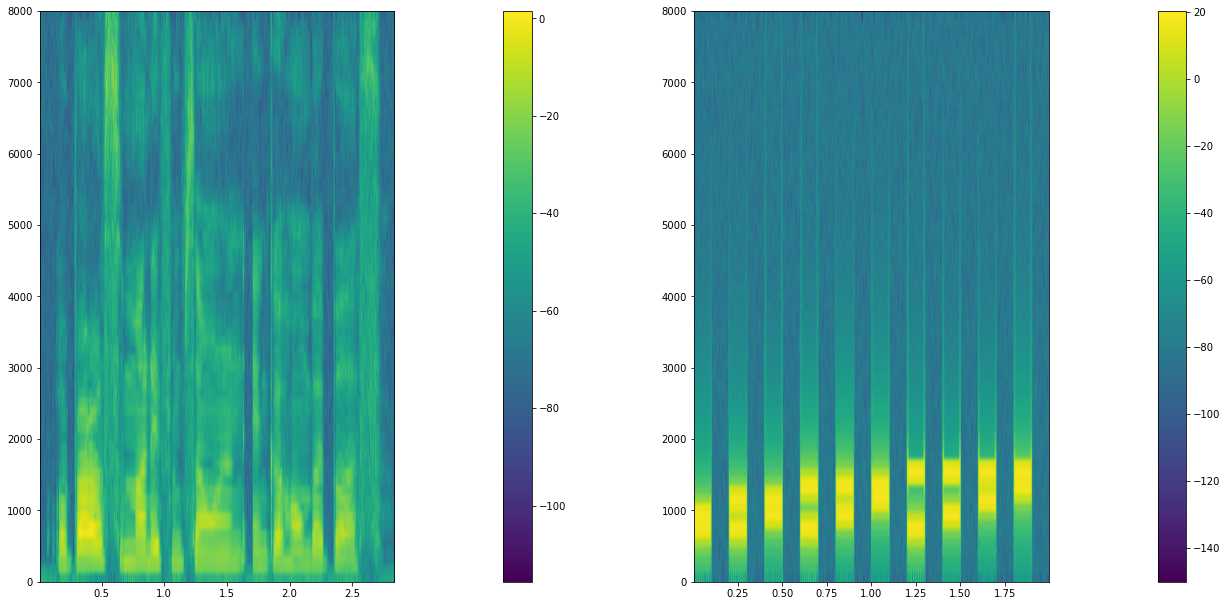

In [34]:
frame_length = 8
frame_shift = 2
frame_length_samples = int(frame_length / millis_per_point)
analysis_window = get_window('hann', int(frame_length_samples), fftbins=True)
m_stft, v_freq, v_time_frame = compute_stft(speech1_data, sampling_rate, frame_length, frame_shift, analysis_window)
fig = plt.figure()
fig.set_size_inches(21.5, 10.5)
ax = fig.add_subplot(121)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
                                                       v_freq[-1]], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)

m_stft_phone, v_freq_phone, v_time_frame_phone = compute_stft(phone_data, sampling_rate, frame_length, frame_shift, analysis_window)
ax = fig.add_subplot(122)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft_phone.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame_phone[0], v_time_frame_phone[-1], v_freq_phone[0],
                                                       v_freq_phone[-1]], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)

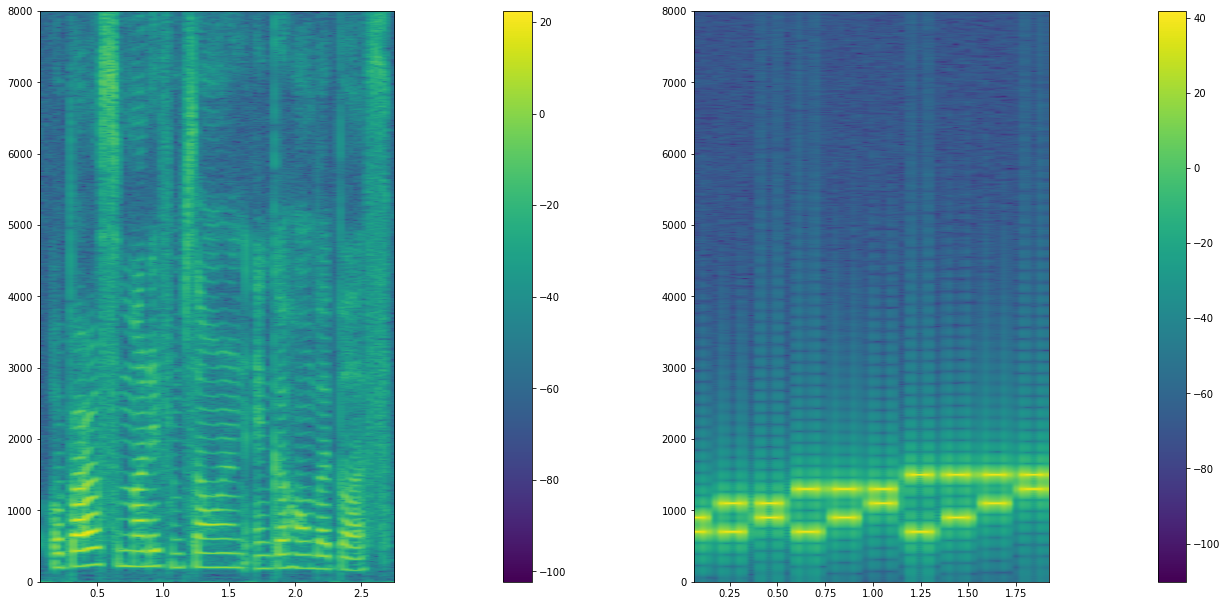

In [35]:
frame_length = 128
frame_shift = 32
frame_length_samples = int(frame_length / millis_per_point)
analysis_window = get_window('hann', int(frame_length_samples), fftbins=True)
m_stft, v_freq, v_time_frame = compute_stft(speech1_data, sampling_rate, frame_length, frame_shift, analysis_window)
fig = plt.figure()
fig.set_size_inches(21.5, 10.5)
ax = fig.add_subplot(121)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
                                                       v_freq[-1]], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)

m_stft_phone, v_freq_phone, v_time_frame_phone = compute_stft(phone_data, sampling_rate, frame_length, frame_shift, analysis_window)
ax = fig.add_subplot(122)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft_phone.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame_phone[0], v_time_frame_phone[-1], v_freq_phone[0],
                                                       v_freq_phone[-1]], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)

c) in the second plot sinusoidal components are harder to identify and short impulses are easier to identify. The explanation is that by making window frames smaller we gain time resolution but loose frequency resolution. The frequency values leak while the time segments are finer.

The opposite happens in the third plot, it is easier to identify sinusoidal components but almost impossible to see short impulses. Again, because in this case we gain frequency resolution and loose time resolution.

In [39]:
def auto_correlation(frames):
    acf = np.convolve(frames[0], np.flip(frames[0]))
    acf_size = acf.shape[0]
    acfs = np.zeros((frames.shape[0], acf_size))
    for i in range(frames.shape[0]):
        acfs[i] = np.convolve(frames[i], np.flip(frames[i]))

    return acfs

In [40]:
def remove_negatives(acfs):
    acfs_positive = np.zeros((acfs.shape[0], int(acfs.shape[1]/2)+1))
    for i in range(acfs.shape[0]):
        acfs_positive[i] = acfs[i][int(acfs.shape[1]/2):acfs.shape[1]]
    return acfs_positive

In [41]:
def calc_fundamental_freqs(acfs_positive):
    search_range_min = int(16000/400)
    search_range_max = int(16000/80)

    fundamental_freqs = np.zeros(acfs_positive.shape[0])
    for i in range(acfs_positive.shape[0]):
        acf_range = acfs_positive[i][search_range_min: search_range_max+1]
        sample_idx = acf_range.argmax() + search_range_min
        millis = sample_idx / 16000
        fundamental_freqs[i] = 1 / millis
    return fundamental_freqs

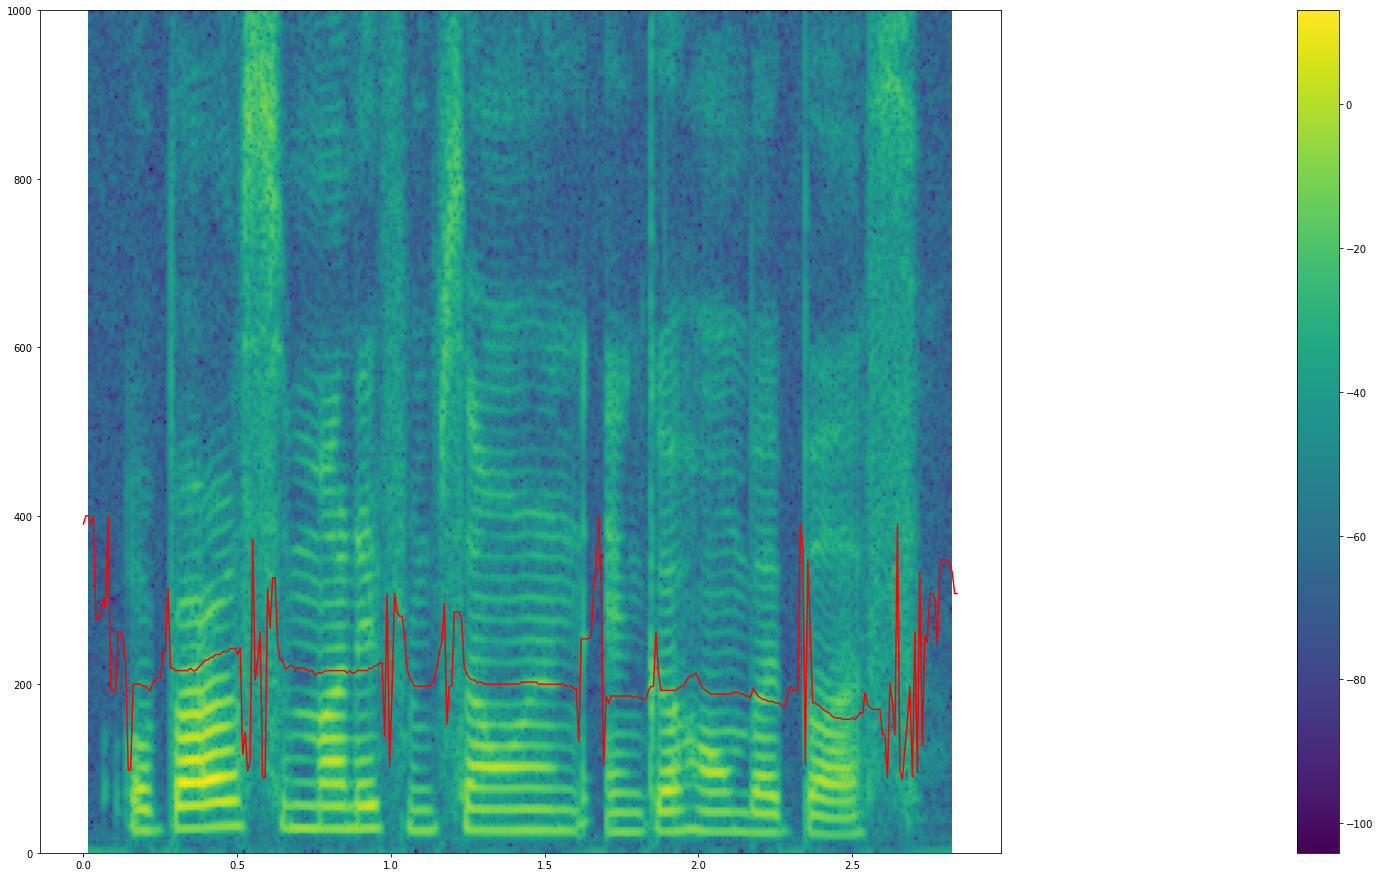

In [79]:
frame_length = 32
frame_shift = 8
frame_length_samples = int(frame_length / millis_per_point)
analysis_window = get_window('hann', int(frame_length_samples), fftbins=True)
m_stft, v_freq, v_time_frame = compute_stft(speech1_data, sampling_rate, frame_length, frame_shift, analysis_window)



[frames1, centers1] = my_windowing(speech1_data, sampling_rate, frame_length, frame_shift)
ac = auto_correlation(frames1)
ac_positive = remove_negatives(ac)
fundamental_freqs1 = calc_fundamental_freqs(ac_positive)


fig = plt.figure()
fig.set_size_inches(26.5, 15.5)
ax = fig.add_subplot(111)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
                                                       1000], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)
ax.plot(np.linspace(0, speech1_data.shape[0]/sampling_rate, num=fundamental_freqs1.shape[0], dtype=np.float32), fundamental_freqs1, c='r', linewidth=1.5)

Yes they match

In [78]:
def convert_to_samples(milliseconds: int, sampling_freq: int):
    """
    Convert a millisecond duration into the number of samples given the sampling frequency.

    :param milliseconds: duration to be converted to number of samples
    :param sampling_freq: the sampling frequency
    :return: number of samples
    """
    return int(milliseconds * (10 ** (-3)) * sampling_freq)

def compute_istft(stft: np.ndarray, sampling_rate: int, frame_shift: int, synthesis_window: np.ndarray) -> [np.ndarray]:
    """
    Compute the inverse short-time Fourier transform.

    :param stft: STFT transformed signal
    :param sampling_rate: the sampling rate in Hz
    :param frame_shift: the frame shift used to compute the STFT in milliseconds
    :param synthesis_window: a numpy array containing a synthesis window function (length must match with time domain
    signal segments that were used to compute the STFT)
    :return: a numpy array containing the time domain signal
    """

    # compute inverse rFFT and apply synthesis window
    time_frames = np.fft.irfft(stft)
    num_frames, samples_per_frame = time_frames.shape
    assert samples_per_frame == len(synthesis_window), "Synthesis window must match the number of samples per frame."
    time_frames *= synthesis_window

    # compute output size
    samples_per_shift = convert_to_samples(frame_shift, sampling_rate)
    output_len = samples_per_frame + (num_frames - 1) * samples_per_shift
    time_signal = np.zeros((output_len))


    # reconstruct signal by adding overlapping windowed segments
    for i in range(num_frames):
        time_signal[i*samples_per_shift:i*samples_per_shift+samples_per_frame] += time_frames[i]

    return time_signal

In [90]:
v_test_signal = np.ones(2048)
sampling_rate = 16000
frame_length = 32
frame_shift = 16

root_hann = np.sqrt(analysis_window)
v_test_stft, _, _ = compute_stft(v_test_signal, sampling_rate, frame_length, frame_shift, root_hann)

In [91]:
synth_signal = compute_istft(v_test_stft, sampling_rate, frame_shift, root_hann)
synth_signal

array([0.00000000e+00, 3.76490804e-05, 1.50590652e-04, ...,
       3.38807706e-04, 1.50590652e-04, 3.76490804e-05])